In [107]:
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
df = pd.read_csv("./titanic.csv")

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Questão 1

In [110]:
percentage = len(df.query("Sex == 'male' and Pclass == 3")) / len(df)
print("A porcentagem de homens na terceira classe é de {:.2f}%".format(percentage * 100))

A porcentagem de homens na terceira classe é de 38.95%


## Questão 2

In [111]:
percentage = len(df.query("Sex == 'female' and Pclass == 1 and Survived == 0")) / len(df)
print("A porcentagem de mulheres na primeira classe que morreram é de {:.2f}%".format(percentage * 100))

A porcentagem de mulheres na primeira classe que morreram é de 0.34%


## Questão 3

Text(0, 0.5, 'Died')

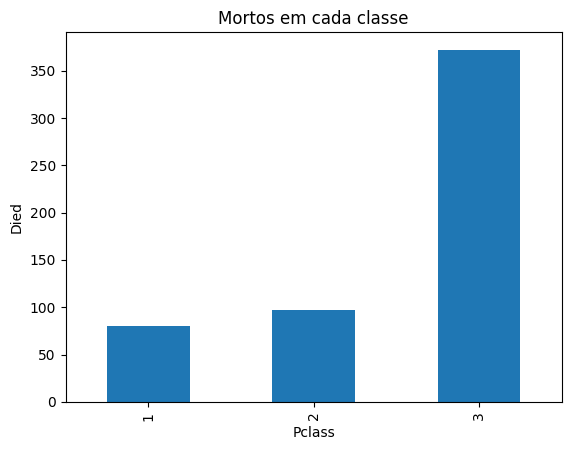

In [112]:
mortos_por_classse = df.assign(Dead=df.Survived.apply(lambda x: 0 if x == 1 else 1)) \
    .groupby("Pclass").sum()["Dead"]

mortos_por_classse.plot(kind="bar")
plt.title("Mortos em cada classe")
plt.ylabel("Died")

In [113]:
p_mortos_por_classse = pd.Series(name="Percentage")
for k, v in mortos_por_classse.items():
    p_mortos_por_classse[k] = v / len(df.query(f"Pclass == {k}")) * 100

Text(0.5, 0, 'PClass')

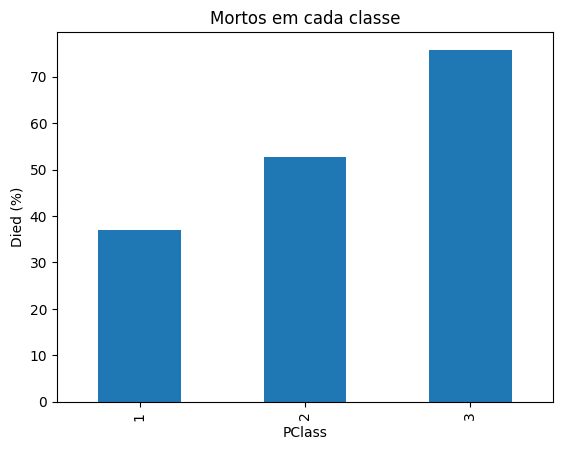

In [114]:
p_mortos_por_classse.plot(kind="bar")
plt.title("Mortos em cada classe")
plt.ylabel("Died (%)")
plt.xlabel("PClass")

Vendo os gráficos, podemos perceber claramente uma correlação entre a classe do passageiro e a quantidade de mortes (quanto maior a classe, maior o número de mortes).

## Questão 3

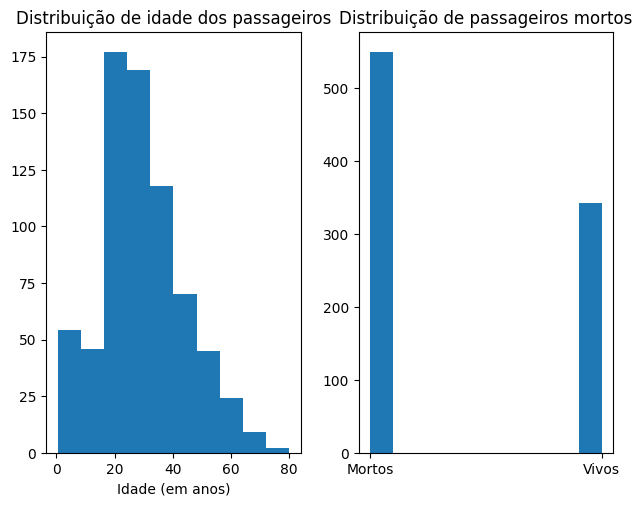

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
ax[0].hist(df["Age"])
ax[0].title.set_text("Distribuição de idade dos passageiros")
ax[0].set_xlabel("Idade (em anos)")


ax[1].hist(df["Survived"])
ax[1].title.set_text("Distribuição de passageiros mortos")
ax[1].set_xticks([0,1], ["Mortos", "Vivos"])

plt.show()